<a href="https://colab.research.google.com/github/anphantt2406/-SVM-UBER-dataset/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# import library
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# import dataset
"""
The dataset given by VEF Academy was clean and processed Feature Selection
to make it suitable for Support Vectors Machine algorithm
"""
dataset = pd.read_csv('https://raw.githubusercontent.com/anphantt2406/UBER/main/uber_usage.csv')
display(dataset.head(10))

,CustomerID,Gender,Age,AnnualSalary,RegularRider
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Target variable **RegularRider** has value 1 when customer uses Uber regularly, and 0 vice versa

In [45]:
dataset.isna().sum()

CustomerID      0
Gender          0
Age             0
AnnualSalary    0
RegularRider    0
dtype: int64

In [46]:
dataset.describe()

,CustomerID,Age,AnnualSalary,RegularRider
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [47]:
print(dataset['RegularRider'].skew())
print(dataset['RegularRider'].value_counts(normalize = True))

0.596902836080957
0    0.6425
1    0.3575
Name: RegularRider, dtype: float64


## Split the dataset

In [48]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, \
                                                    random_state = 9999, \
                                                    stratify = y)
del dataset

In [50]:
print len(X_train), len(X_test), len(y_train), len(y_test)

280 120 280 120


## Standardise features using StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train model using SVM

In [52]:
# Fitting SVM to the training set
# Use probability=True to get the predicted probabilities of the positive class (1) to calculate AUC later on
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

# Predicting y and probabilities for the train set
y_train_pred = classifier.predict(X_train)
# Probabilities will be given for 0 and 1; we only need those for the positive class (1) to calculate AUC 
y_train_probs = classifier.predict_proba(X_train)[:, 1]

# Predicting y and probabilities for the test set
y_test_pred = classifier.predict(X_test)
# Probabilities
y_test_probs = classifier.predict_proba(X_test)[:, 1]

**Calculate the TP rate, FP rate, FN rate, Precision, Recall, F1 score, and AUC on the training set and test set. Compare the AUC on the  training set and test set.**

In [53]:
def cal(y_true, y_pred, y_prob):
    """ 
    This function to calculate TP rate, FP rate, FN rate, Precision, Recall, F1 score, and AUC
    Input: y_true, y_pred, y_prob
    y_true: array of ground truth (correct) target values 
    y_pred: array of predicted target values 
    y_prob: array of predicted probability of positive class (1)
    """

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    # True Negative, False Positive, False Negative, True Positive
    tn, fp, fn, tp = cm.ravel()

    # Number of positive cases in the ground truth    
    p = float(tp + fn)
    # Number of negative cases in the ground truth
    n = float(fp + tn)
    
    # TP rate 
    tp_rate = tp / p

    # FP rate 
    fp_rate = fp / n
    
    # FN rate
    fn_rate = fn / p
    
    prec = tp / float(tp + fp)
    recall = tp_rate
    
    f1_score = 2.0*prec*recall/(prec + recall)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr)

    auc = roc_auc_score(y_true=y_true, y_score=y_prob)
        
    return tp_rate, fp_rate, fn_rate, prec, recall, f1_score, auc


* **On the training set**

On the training set: 
()
('True Positive rate =', 0.64)
('False Positive rate = ', 0.08333333333333333)
('Flase Negative rate =', 0.36)
('Precision =', 0.810126582278481)
('Recall =', 0.64)
('F1 score =', 0.7150837988826816)
0.9178888888888889


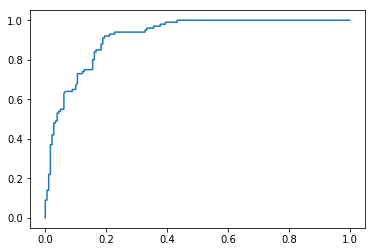

In [54]:
# Calculate the parameters on the train set
tp_rate_train, fp_rate_train, fn_rate_train, prec_train, recall_train, f1_score_train, auc_train \
                = cal(y_train, y_train_pred, y_train_probs)
print('On the training set: ')
print()
print('True Positive rate =', tp_rate_train)
print('False Positive rate = ', fp_rate_train)
print('Flase Negative rate =', fn_rate_train)
print('Precision =', prec_train)
print('Recall =', recall_train)
print('F1 score =', f1_score_train)
print auc_train


* **On the test set**

On the test set: 
()
('True Positive rate =', 0.6744186046511628)
('False Positive rate = ', 0.025974025974025976)
('Flase Negative rate =', 0.32558139534883723)
('Precision =', 0.9354838709677419)
('Recall =', 0.6744186046511628)
('F1 score =', 0.7837837837837838)
0.9284204167925099


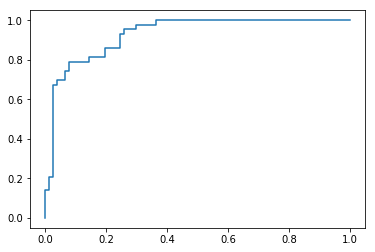

In [55]:
# Calculate the parameters on the test set
tp_rate_test, fp_rate_test, fn_rate_test, prec_test, recall_test, f1_score_test, auc_test \
                = cal(y_test, y_test_pred, y_test_probs)
print('On the test set: ')
print()
print('True Positive rate =', tp_rate_test)
print('False Positive rate = ', fp_rate_test)
print('Flase Negative rate =', fn_rate_test)
print('Precision =', prec_test)
print('Recall =', recall_test)
print('F1 score =', f1_score_test)
print auc_test

AUC_test > AUC_train 

* **Visualize the feature values and labels of the training set using a scatter plot. Also plot the line that is used to separate the two classes**
* *Notes: Can use the original values or standardized values for age and salary*

In [56]:
X_train[y_train == 1, 0]

array([ 1.9530355 , -1.04943489,  2.05311785,  1.05229439,  1.35254143,
        1.65278847,  2.1532002 ,  0.95221204,  0.45180031,  0.85212969,
        1.15237673,  0.45180031, -0.14869377,  0.15155327,  0.75204735,
        0.85212969,  1.05229439,  1.9530355 ,  0.95221204,  0.05147092,
        1.25245908,  0.95221204,  1.45262377,  1.15237673,  1.15237673,
       -0.04861143,  0.75204735, -0.34885846,  0.35171796, -0.04861143,
       -0.14869377,  1.55270612,  1.55270612,  0.55188265, -0.14869377,
        0.75204735,  0.75204735,  1.05229439,  0.15155327,  0.45180031,
        1.25245908, -0.04861143, -0.14869377, -0.8492702 , -0.04861143,
        0.95221204,  1.35254143,  0.75204735,  1.75287081,  0.45180031,
       -0.74918785, -0.94935254,  1.65278847,  0.95221204,  0.95221204,
        0.95221204,  1.05229439,  1.65278847,  2.05311785,  1.9530355 ,
       -0.74918785,  1.55270612,  0.95221204,  1.05229439,  1.15237673,
        1.15237673,  0.85212969,  0.85212969,  1.05229439,  2.25

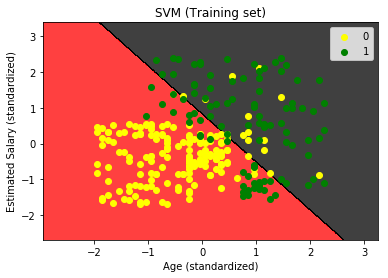

In [57]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age (standardized)')
plt.ylabel('Estimated Salary (standardized)')
plt.legend()
plt.show()

## Visualize the feature values and decisions on another scatter plot.  Also plot the line that is used to separate the two classes.
### Notes: Can use the original values or standardized values for age and salary

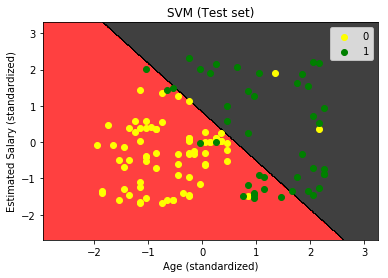

In [58]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age (standardized)')
plt.ylabel('Estimated Salary (standardized)')
plt.legend()
plt.show()